# Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Data Cleaning / Preparation

In [170]:
# Importing all the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


In [171]:
# Reading the dataset
# C:\\Users\\abhishek\\Downloads\\Lead+Scoring+Case+Study\\Lead Scoring Assignment\\
df = pd.read_csv("C:\\Users\\abhishek\\Downloads\\Lead+Scoring+Case+Study\\Lead Scoring Assignment\\Leads.csv")
# df = pd.read_csv("Leads.csv")

In [172]:
# Printing the top 5 rows 
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [173]:
# Printing the bottom 5 rows
df.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [174]:
# Printing the shape of the dataset
df.shape

(9240, 37)

In [175]:
# Printing the names of the columns
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [176]:
# Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [177]:
# Description of the numeric columns
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [178]:
# Percentage of missing values in the dataset
(df.isna().sum() / len(df)) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

- As seen in the cell above, columns such as **'Asymmetrique Activity Index'**, **'Asymmetrique Profile Index'**, **'Asymmetrique Activity Score'**, **'Asymmetrique Profile Score'** and **'Lead Quality'** lead with a high percentage of missing values, i.e. Over 40%.
<br>

- A few other columns have missing values which are less than 40%. Let's inspect these missing values further and take action accordingly.

In [179]:
# Inspecting the 'Specialization' column
df['Specialization'].value_counts(dropna = False, normalize=True) * 100

Select                               21.017316
NaN                                  15.562771
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

- As mentioned in the data dictionary, the value 'Select' means that the customer had not selected the option while filling out the form. Thus, we can conclude that the value 'Select' is as good as NaN value. So the total percentage of missing value in this column adds up to 37% approximately. However, this column seems relavant and important for the analysis. Therefore, we will not drop this column from the dataset and the missing value can be converted into a value called 'Others'.

In [180]:
# Converting missing values into 'Others' (Specialization column)
df['Specialization'] = df['Specialization'].replace('Select', "Others")
df['Specialization'] = df['Specialization'].fillna("Others")

In [181]:
# Specialization column after converting the values
df['Specialization'].value_counts(dropna= False)

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [182]:
# Inspecting the 'How did you hear about X Education' column
df['How did you hear about X Education'].value_counts(dropna=False, normalize=True) * 100

Select                   54.577922
NaN                      23.885281
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

- As seen in the cell above, the NaN values are 23%. However, after adding up the 'Select' values, the missing values go up to 78%. Therefore, we will drop this column as the number of missing values are very high.

In [183]:
# Creating a list of columns that are to be dropped
drop_columns = ['How did you hear about X Education']

In [184]:
#Inspecting 'What is your current occupation' column
df['What is your current occupation'].value_counts(dropna=False, normalize=True) * 100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

- As seen in the cell above, the occupation column contains approximately 30% missing values. Since, this seems like an important indicator for the analysis, we will not drop this column. Therefore, we will replace the NaN values with 'Other' value.

In [185]:
# Replacing NaN values with 'Other' (What is your current occupation)
df['What is your current occupation'] = df['What is your current occupation'].fillna('Other')

In [186]:
# 'What is your current occupation' column after converting the values
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [187]:
#Inspecting the 'What matters most to you in choosing a course' column
df['What matters most to you in choosing a course'].value_counts(dropna=False, normalize=True) * 100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

- As seen in the cell above, the column 'What matters most to you in choosing a course' has approximately 30% of missing values. Since the column is filled with 70% of 'Better Career Prospects' value, we can replace the NaN values with the mode instead of replacing it with 'Other'.

In [188]:
# Replacing the NaN values with Mode (What matters most to you in choosing a course)
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0])

In [189]:
# 'What matters most to you in choosing a course' column after replacing the columns
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [190]:
# Inspecting the 'Lead Quality' column
df['Lead Quality'].value_counts(dropna=False, normalize=True)* 100

NaN                  51.590909
Might be             16.883117
Not Sure             11.818182
High in Relevance     6.893939
Worst                 6.504329
Low in Relevance      6.309524
Name: Lead Quality, dtype: float64

- Since, the column 'Lead Quality' has a large parcentage of missing values, we can go ahead by dropping this column

In [191]:
# Adding 'Lead Quality' to drop_columns variable
drop_columns.append('Lead Quality')

In [192]:
# Inspecting the 'Lead Profile' column
df['Lead Profile'].value_counts(dropna=False, normalize=True) * 100

Select                         44.870130
NaN                            29.318182
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64

- As seen in the cell above, the column 'Lead Profile' has approximately 30% of missing values. However, after adding up the 'Select' values, the missing values for this particular column goes up to 75%. Therefore, we will drop this column as the percentage of missing value is very high.

In [193]:
# Inspecting the 'Tags' column
df['Tags'].value_counts(dropna=False, normalize=True) * 100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

- As seen in the cell above, the 'Tags' column contains almost 37% of missing values. Therefore, we will go ahead by dropping the 'Tags' Column

In [194]:
# Adding 'Lead Profile' to drop_columns list
drop_columns.append('Lead Profile')

In [195]:
# Inspecting the 'Update me on Supply Chain Content' column
df['Update me on Supply Chain Content'].value_counts(normalize=True) * 100

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [196]:
# Inspecting the 'Get updates on DM Content' column
df['Get updates on DM Content'].value_counts(normalize=True) * 100

No    100.0
Name: Get updates on DM Content, dtype: float64

In [197]:
# Inspecting the 'I agree to pay the amount through cheque ' column
df['I agree to pay the amount through cheque'].value_counts(normalize=True) * 100

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

- As seen in the three cells above, the column is 'yes' and 'No' oriented. However, the data seems to be completely skewed with all the values being No 100%. As a result, we can drop these three columns as it is not at all helpful for our analysis.

In [198]:
# Adding all the three columns and Tags column to drop_columns

drop_columns.extend(['Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'])

In [199]:
# Adding other columns with high percentage of missing values and unecessary columns to drop_columns list
drop_columns.extend(['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score', 'City', 'Country', 'Lead Number', 'Prospect ID', 'Receive More Updates About Our Courses', 'Tags'])

In [200]:
#List of columns that are to be dropped
drop_columns

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'City',
 'Country',
 'Lead Number',
 'Prospect ID',
 'Receive More Updates About Our Courses',
 'Tags']

In [201]:
# Dropping all the selected columns
df = df.drop(drop_columns, axis=1)

In [202]:
# Shape of the dataset after dropping the columns
df.shape

(9240, 21)

In [203]:
# Columns after dropping the selected columns
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [204]:
# Inspecting 'Lead Source' columns
df['Lead Source'].value_counts(dropna=False, normalize=True) * 100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

- As seen in the cell above, 0.38% of the values are missing. Therefore, we can drop these rows as they are very small comparitively.
<br>

- In this column, there are misspelled values. For instance, There are two variations of 'Google', i.e. 'Google' and 'google'. Also 'WeLearnblog_Home' and 'WeLearn'. Lets go ahead and fix this issue.

In [205]:
# Fixing the spelling errors
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')
df['Lead Source'] = df['Lead Source'].replace('WeLearnblog_Home', 'WeLearn')

In [206]:
# Dropping the NaN values
df= df.dropna(subset=["Lead Source"])

In [207]:
df['Lead Source'].value_counts(dropna=False)

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [208]:
# Dropping NaN values from other columns which are missing at a low percentage
df = df.dropna(subset=['Page Views Per Visit', 'Last Activity'])

In [209]:
# Missing values info after cleaning the dataset
df.isna().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
A free copy of Mastering The In

# Exploratory Data Analysis (EDA)

## Univariate Data Analysis

In [210]:
# Defining a function called plot which creates graphs
def plot(data,title,size,x):
    plt.figure(figsize = size)
    sns.countplot(x=data)
    plt.title(title)
    plt.xticks(rotation = x)
    plt.show()

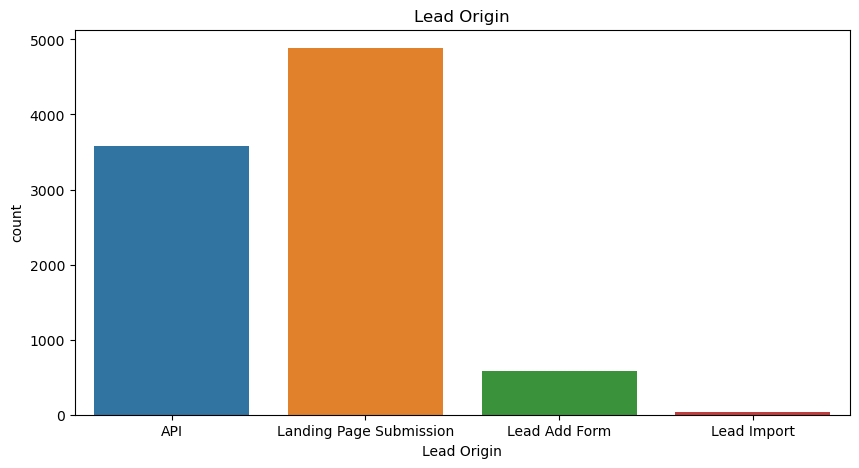

In [211]:
# Plotting the countplot of 'Lead Origin'
plot(df['Lead Origin'],'Lead Origin',(10,5),0)

- Inference: Lead Origin are have four categorical values of which API and Landing page submission values are high 

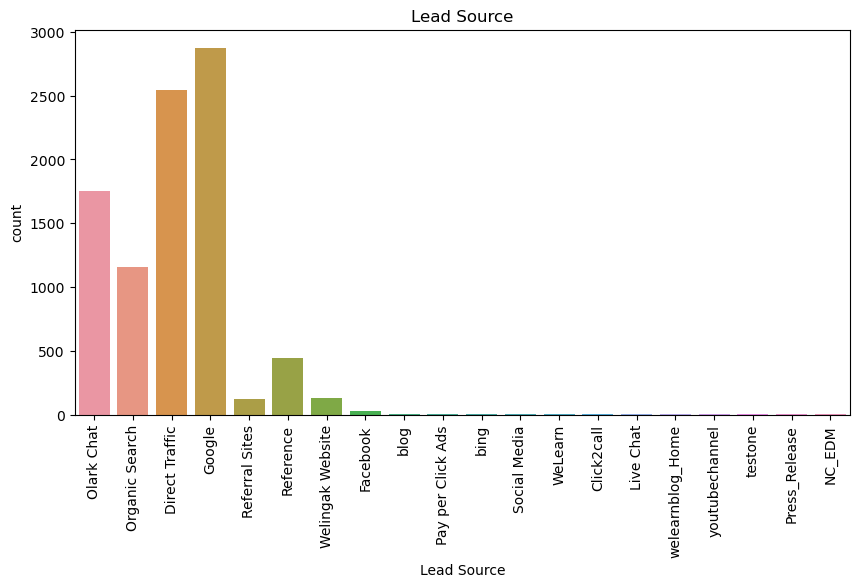

In [212]:
# Plotting the countplot of 'Lead Source'
plot(df['Lead Source'],'Lead Source',(10,5),90)

- Inference - Leads are sourced from multiple sources. Majority of sourcing is from Google , direct traffic , Olark chat.

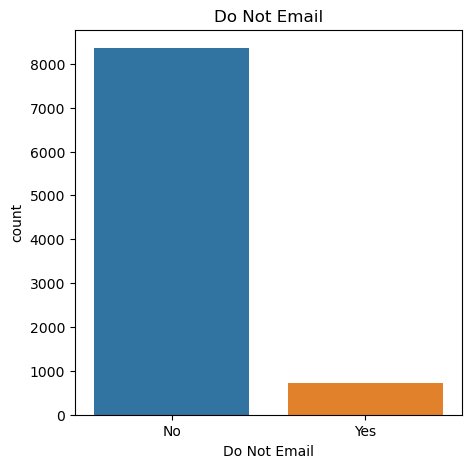

In [213]:
# Plotting the countplot of 'Do Not Email'
plot(df['Do Not Email'],'Do Not Email',(5,5),0)

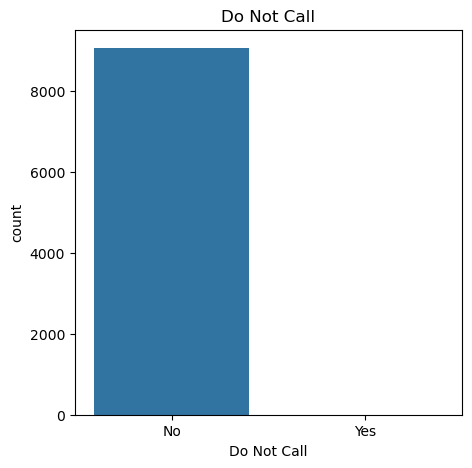

In [214]:
# Plotting the countplot of 'Do Not Call'
plot(df['Do Not Call'],'Do Not Call',(5,5),0)

- Inference - Leads have opted for EMail and calls as we see above.

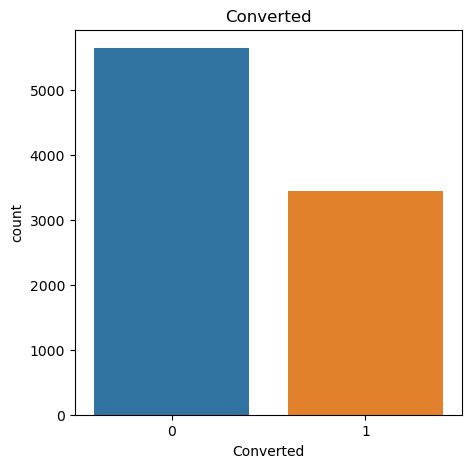

In [215]:
# Plotting the countplot of 'Converted'
plot(df['Converted'],'Converted',(5,5),0)

- Inference - leads getting converted are less.

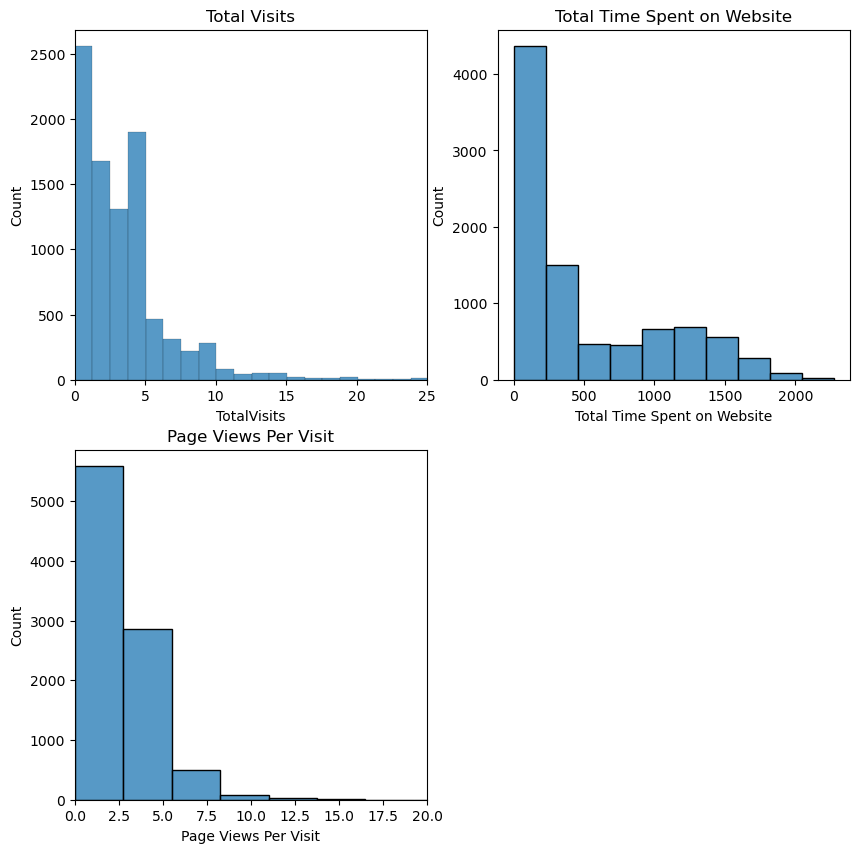

In [216]:
# Plotting the histplot of the numeric variables
plt.figure(figsize = (10,10))

plt.subplot(221)
sns.histplot(df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
sns.histplot(df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
sns.histplot(df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.show()

- Inference : Above data shows that not all leads have visited the website and spent time on website.  

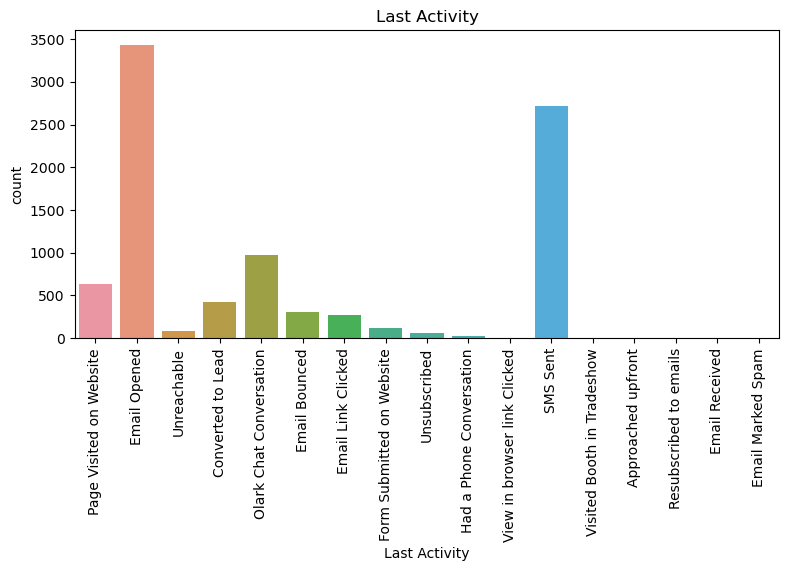

In [217]:
# Plotting the countplot of 'Last Activity'

plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
sns.countplot(x='Last Activity', data=df).tick_params(axis='x', rotation=90)
plt.title('Last Activity')
plt.show()

- Inference : The column 'Last Activity' refers to the last known activity performed by the customer wherein Email Opened and SMS sent lead the chart.

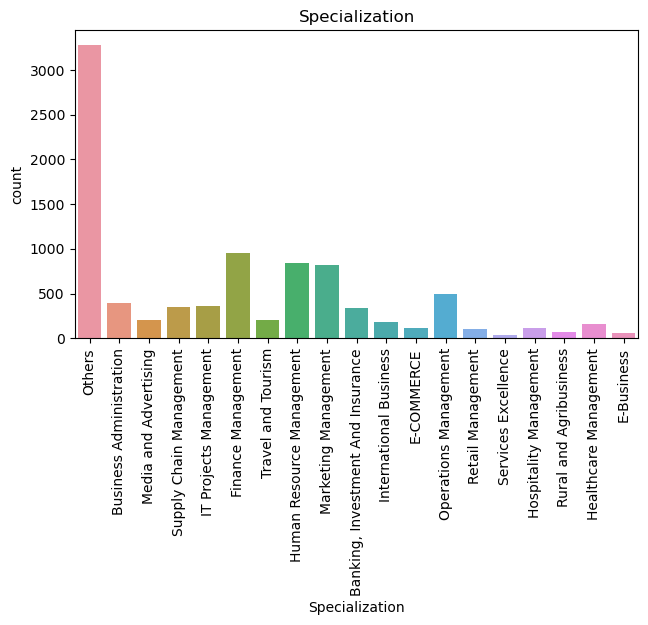

In [218]:
# Plotting the countplot of 'Specialization'

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Specialization', data=df).tick_params(axis='x', rotation=90)
plt.title('Specialization')
plt.show()

- Inference: The column 'Specialization' refers to the domain in which the customer had worked earlier. As the data is unavailable for this particular column, 'Others' shows a very high number. However, Finance management is the next highest domain followed by HR management and Banking, Investment and Insurance sector.

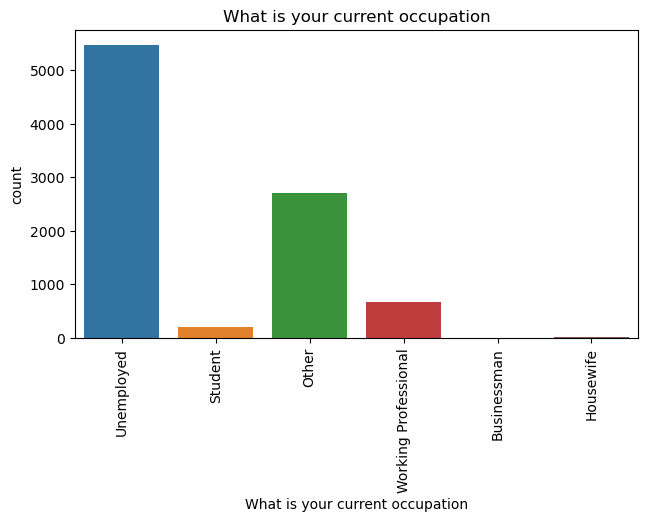

In [219]:
# Plotting the countplot of 'What is your current occupation'

plt.figure(figsize=(16,4))
plt.subplot(1, 2, 2)
sns.countplot(x='What is your current occupation', data=df).tick_params(axis='x', rotation=90)
plt.title('What is your current occupation')
plt.show()

- Inference: The column ' What is your current occupation' refers to the current occuptaion of the customer, wherein Unemployed is the highest followed by others.

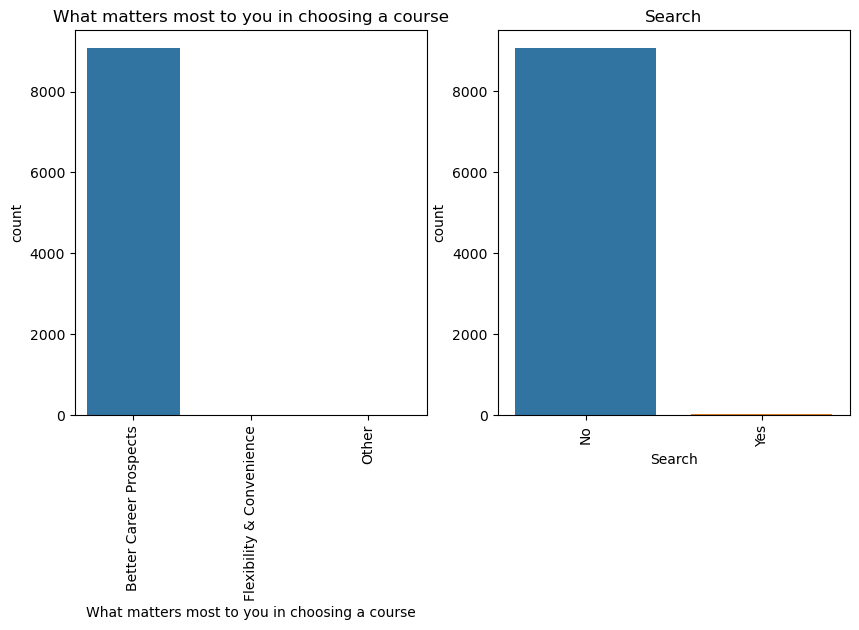

In [220]:
# Plotting the countplot of 'What matters most to you in choosing a course' and ' Search'

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='What matters most to you in choosing a course', data=df).tick_params(axis='x', rotation=90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1, 2, 2)
sns.countplot(x='Search', data=df).tick_params(axis='x', rotation=90)
plt.title('Search')

plt.show()

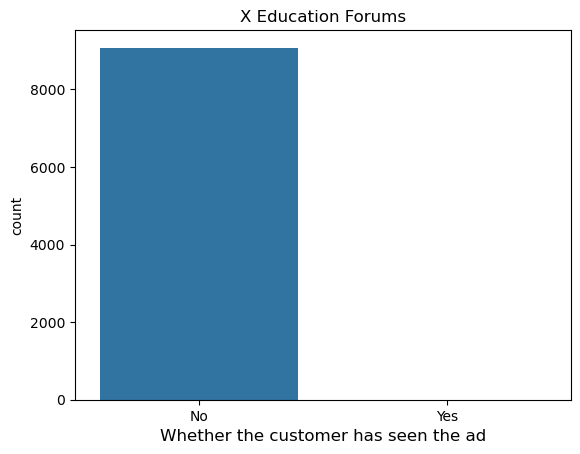

In [221]:
# Plotting the countplot of 'X Education Forums'

sns.countplot(data=df, x='X Education Forums')
plt.title('X Education Forums')
plt.xlabel('Whether the customer has seen the ad', fontsize=12)
plt.show()

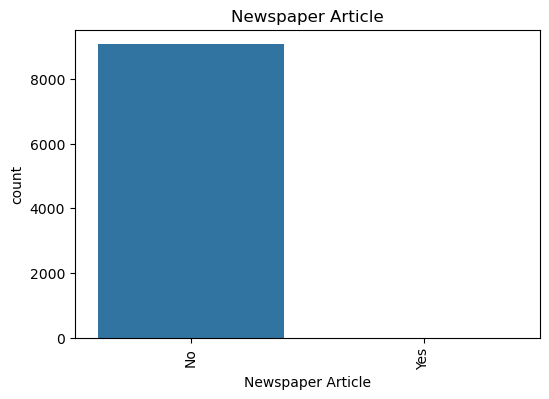

In [222]:
# Plotting the countplot of 'Newspaper Article'

plt.figure(figsize=(6, 4))
sns.countplot(x='Newspaper Article', data=df).tick_params(axis='x', rotation=90)
plt.title('Newspaper Article')
plt.show()

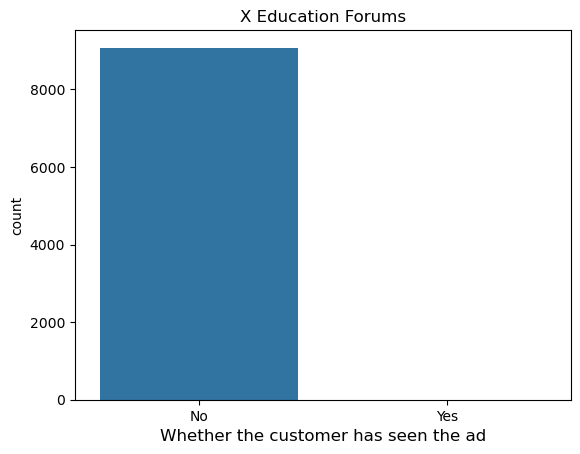

In [223]:
# Plotting the countplot of 'X Education Forums'

sns.countplot(data=df, x='X Education Forums')
plt.title('X Education Forums')
plt.xlabel('Whether the customer has seen the ad', fontsize=12)
plt.show()

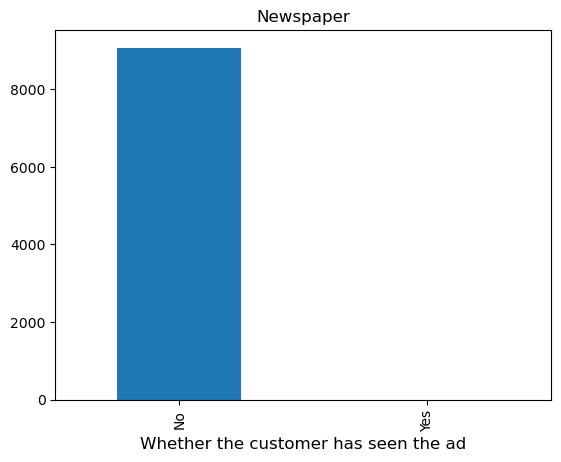

In [224]:
# Plotting the countplot of 'Newspaper'

df['Newspaper'].value_counts().plot(kind='bar')
plt.title('Newspaper')
plt.xlabel("Whether the customer has seen the ad", fontsize=12)
plt.show()

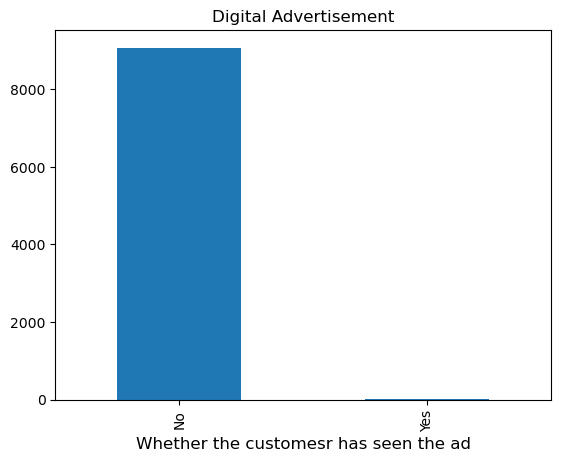

In [225]:
# Plotting the countplot of 'Digital Advertisement'

df['Digital Advertisement'].value_counts().plot(kind='bar')
plt.title('Digital Advertisement')
plt.xlabel("Whether the customesr has seen the ad", fontsize=12)
plt.show()

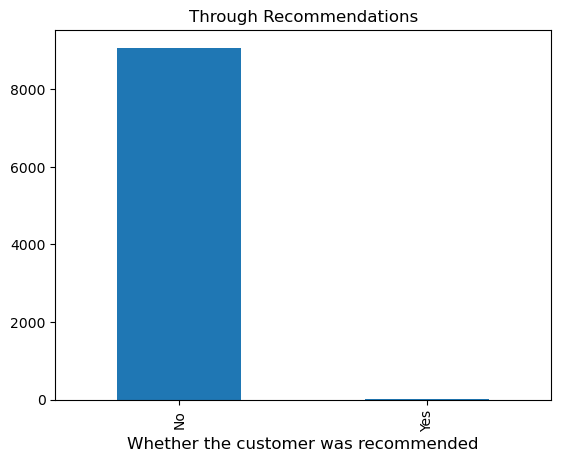

In [226]:
# Plotting the countplot of 'Through Recommendations'

df['Through Recommendations'].value_counts().plot(kind='bar')
plt.title('Through Recommendations')
plt.xlabel("Whether the customer was recommended", fontsize=12)
plt.show()

Text(0.5, 0, "Whether the customer wants a copy of 'Mastering The Interview'")

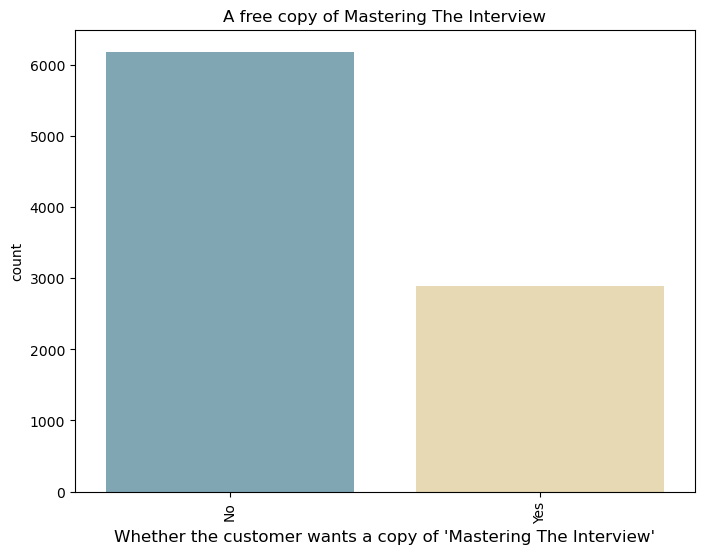

In [227]:
# Plotting the countplot of 'A free copy of Mastering The Interview'

plt.figure(figsize=(8,6))
sns.countplot(x='A free copy of Mastering The Interview', data=df, palette='blend:#7AB,#EDA')
plt.xticks(rotation=90)
plt.title('A free copy of Mastering The Interview')
plt.xlabel("Whether the customer wants a copy of 'Mastering The Interview'", fontsize=12)

- Inference: The column 'A free copy of Mastering The Interview' refers to whether the customer opted for a book, wherein almost 6000 customers have not opted for the book and the rest have opted for the book. 

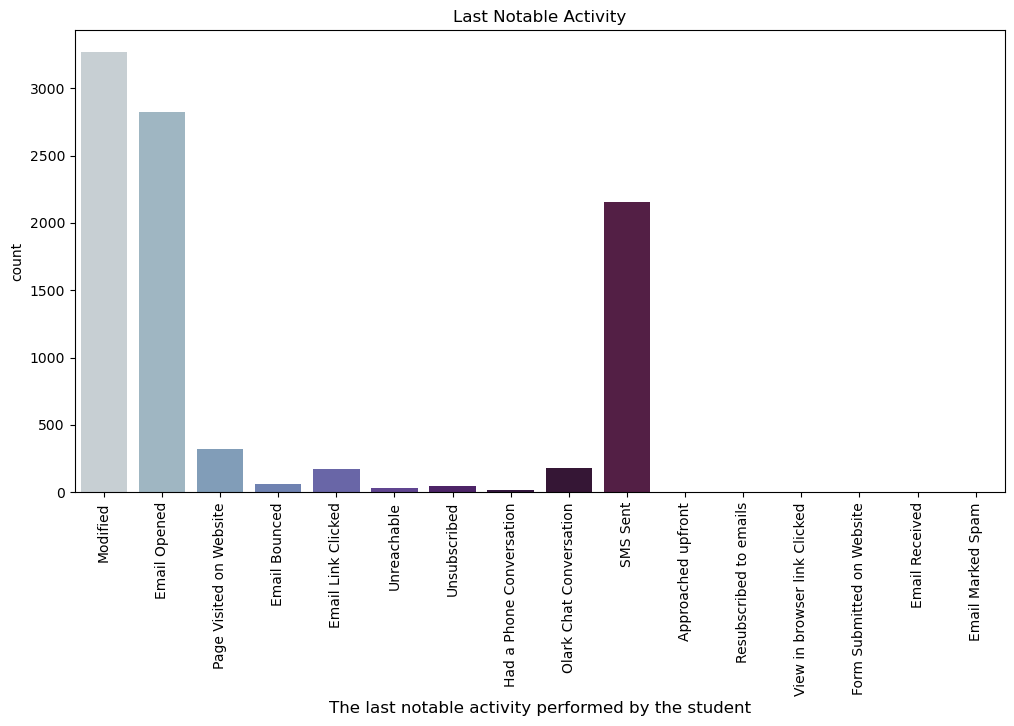

In [228]:
# Plotting the countplot of 'Last Notable Activity'

plt.figure(figsize=(12,6))
sns.countplot(x='Last Notable Activity', data=df, palette='twilight')
plt.xticks(rotation=90)
plt.title('Last Notable Activity')
plt.xlabel("The last notable activity performed by the student", fontsize=12)
plt.show()

- Inference: 'last notable activity' refers to the recent notable activity performed by the student. As seen in the graph, Modified being the highest followed by Email Opened and SMS sent.

## Bi-Variate Data Analysis

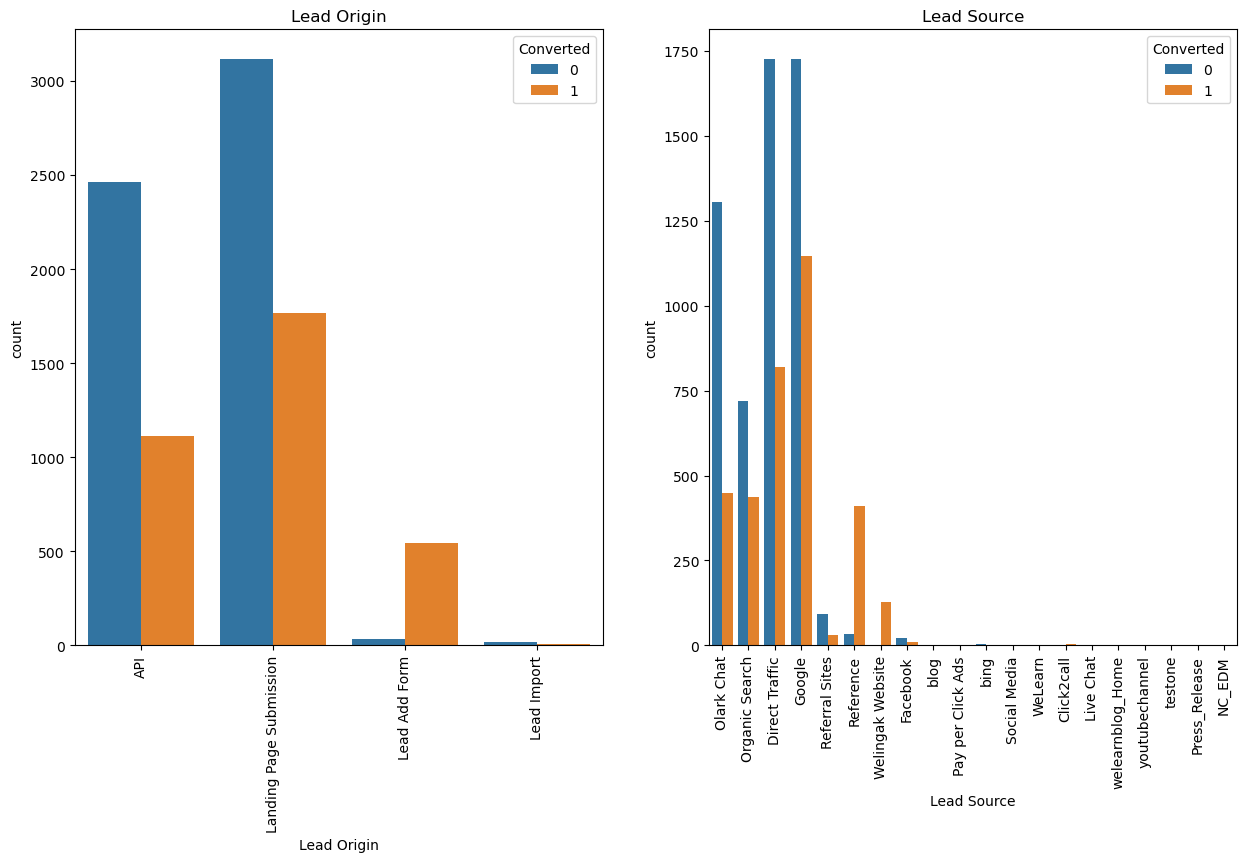

In [229]:
# Plotting the countplot of 'Lead Origin' and 'Lead Source' with 'Converted' as the hue parameter.

plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

- Inference: Converted leads are soured from google and direct traffic and also their Origin is landing page submission

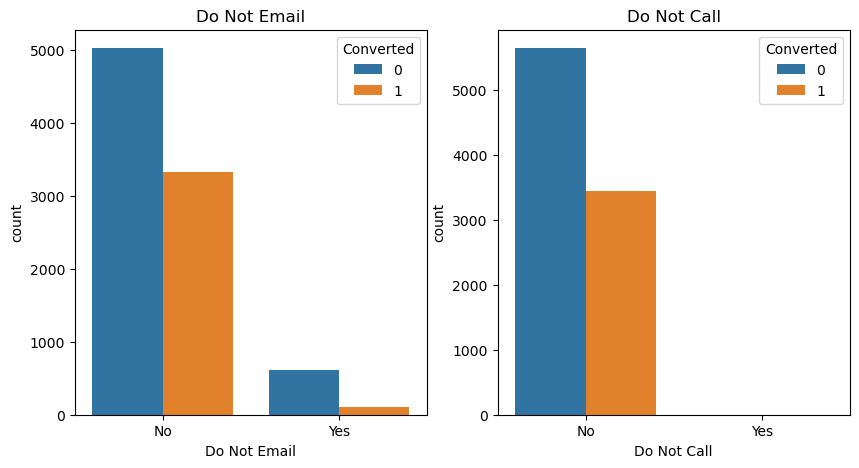

In [230]:
# Plotting the countplot of 'Do Not Email' and 'Do Not Call' with 'Converted' as the hue parameter.

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df).tick_params(axis='x', rotation = 0)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df).tick_params(axis='x', rotation = 0)
plt.title('Do Not Call')
plt.show()

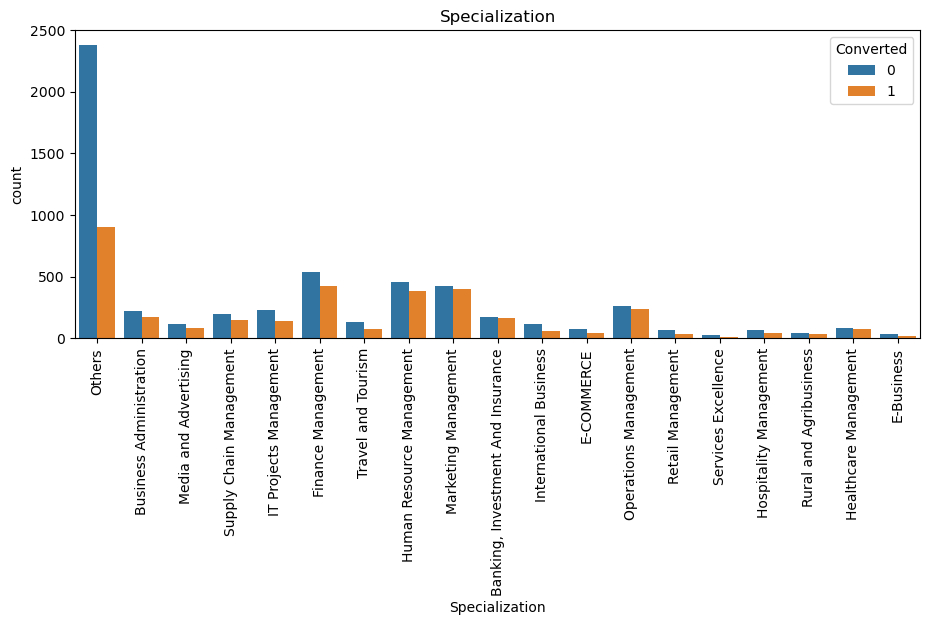

In [231]:
# Plotting the countplot of 'Specialization' with 'Converted' as the hue parameter.

plt.figure(figsize=(24, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='Specialization', hue='Converted', data=df).tick_params(axis='x', rotation=90)
plt.title('Specialization')

plt.show()

- Inference: As seen in the chart above, Others lead the chart with maximum number of customers who have not converted (0) and those who have converted (1). However, the ratio of conversion and non conversion in **Operations Management**, **Marketing Management**, **Human Resource Management** and **Healthcare Management** is quite decent compared to other values.

Text(0.5, 1.0, 'Last Notable Activity vs Converted')

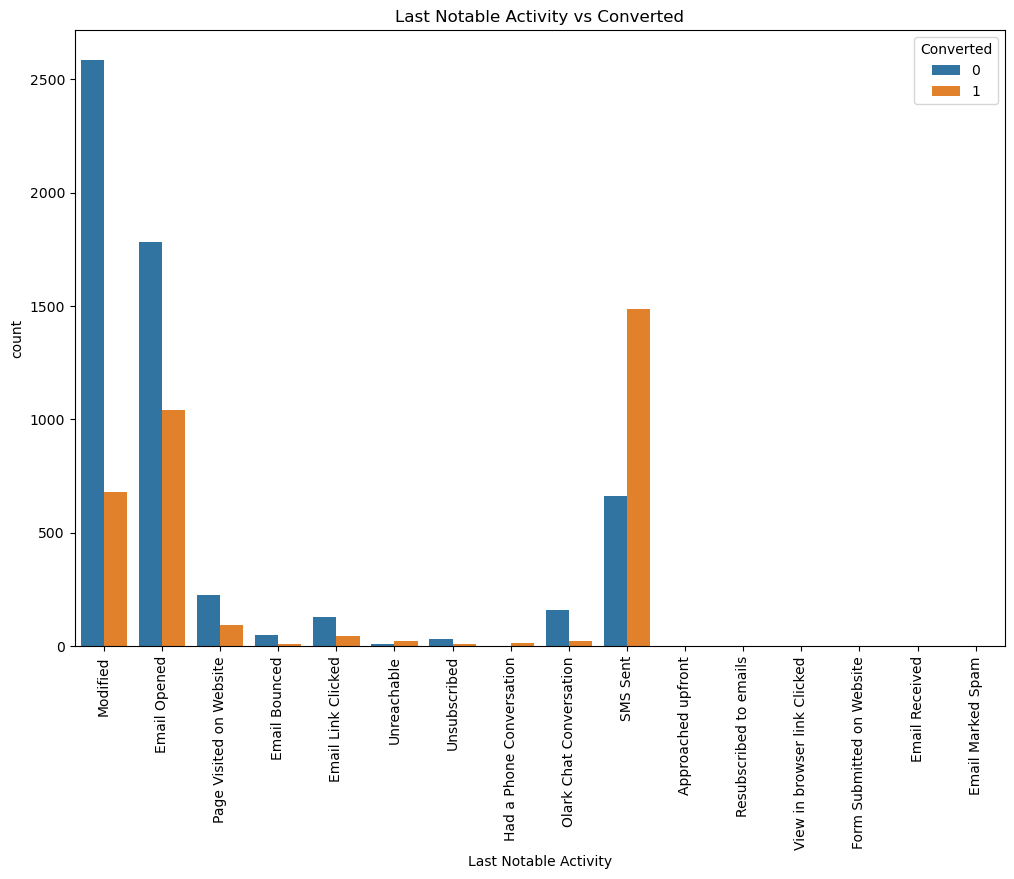

In [232]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Last Notable Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity vs Converted')

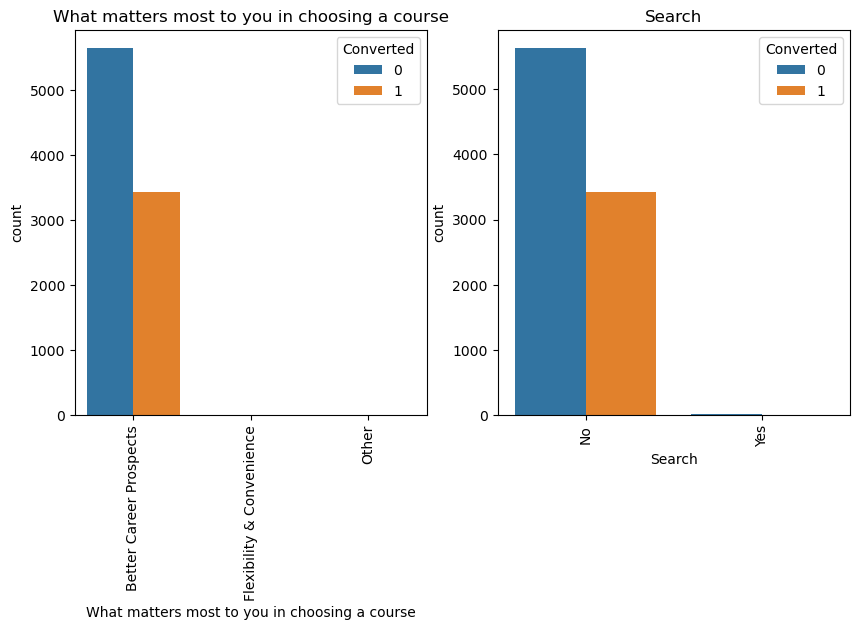

In [233]:
# Plotting the countplot of 'What matters most to you in choosing a course' and 'Search' with 'Converted' as the hue parameter.

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=df).tick_params(axis='x', rotation=90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1, 2, 2)
sns.countplot(x='Search', hue='Converted', data=df).tick_params(axis='x', rotation=90)
plt.title('Search')

plt.show()

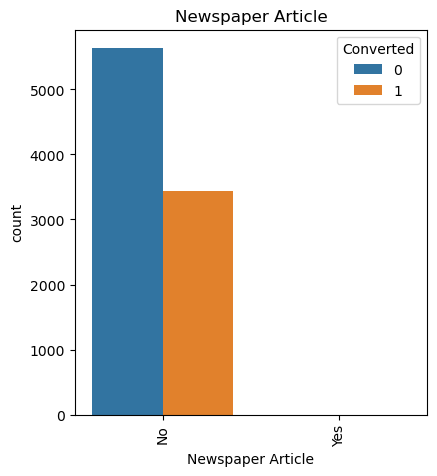

In [234]:
# Plotting the countplot of 'Newspaper Article' with 'Converted' as the hue parameter.

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Newspaper Article', hue='Converted', data=df).tick_params(axis='x', rotation=90)
plt.title('Newspaper Article')

plt.show()

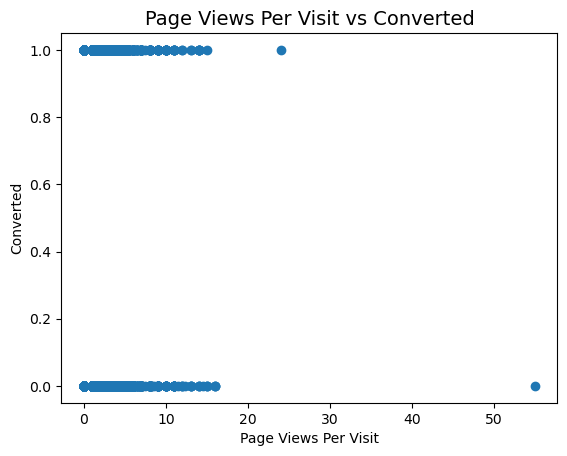

In [235]:
# Plotting the scatter of 'Page Views Per Visit' vs 'Converted'.

plt.scatter(df['Page Views Per Visit'], df['Converted'])
plt.xlabel('Page Views Per Visit')
plt.ylabel('Converted')
plt.title('Page Views Per Visit vs Converted', fontsize=14)
plt.show()

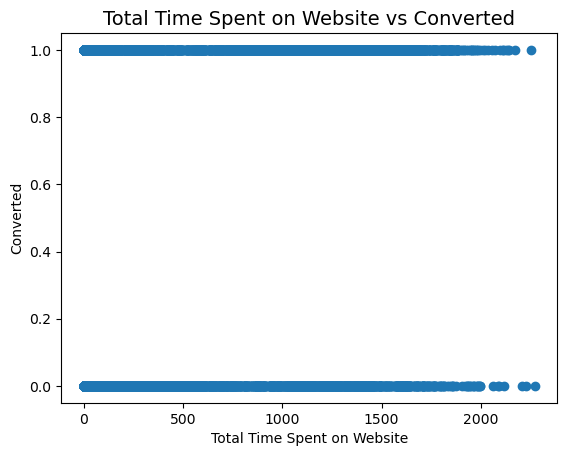

In [236]:
# Plotting the scatter of 'Total Time Spent on Website' vs 'Converted'.
plt.scatter(df['Total Time Spent on Website'], df['Converted'])
plt.xlabel('Total Time Spent on Website')
plt.ylabel('Converted')
plt.title('Total Time Spent on Website vs Converted', fontsize=14)
plt.show()

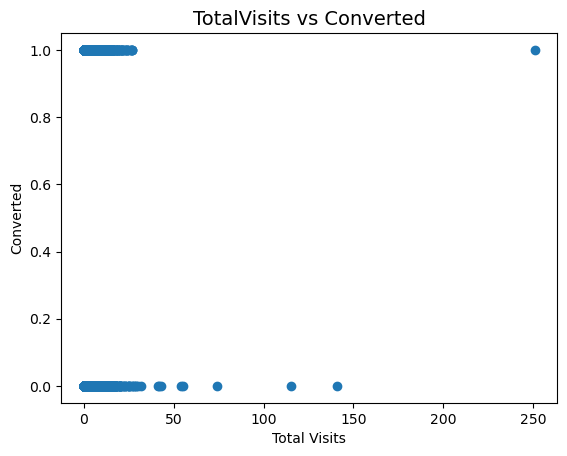

In [237]:
# Plotting the scatter of 'TotalVisits' vs 'Converted'.
plt.scatter(df['TotalVisits'], df['Converted'])
plt.xlabel('Total Visits')
plt.ylabel('Converted')
plt.title('TotalVisits vs Converted', fontsize=14)
plt.show()

Text(0.5, 0, "Whether the customer wants a copy of 'Mastering The Interview'")

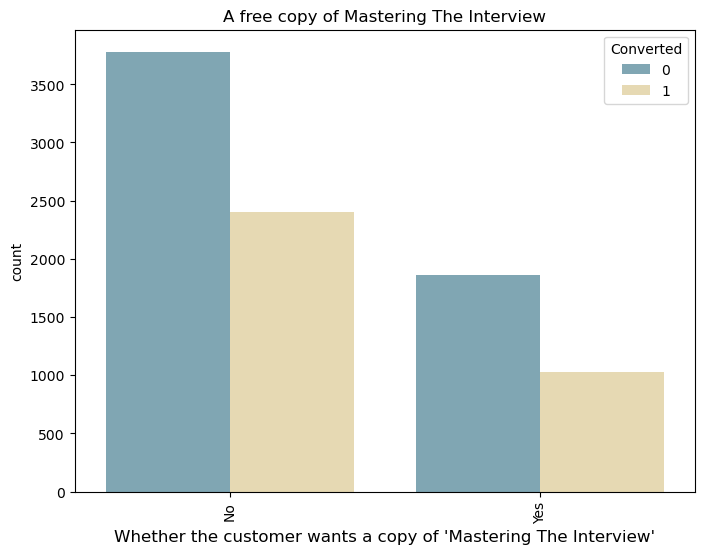

In [238]:
# Plotting the countplot of 'A free copy of Mastering The Interview' with 'Converted' as the hue parameter.

plt.figure(figsize=(8,6))
sns.countplot(x='A free copy of Mastering The Interview', data=df, palette='blend:#7AB,#EDA', hue='Converted')
plt.xticks(rotation=90)
plt.title('A free copy of Mastering The Interview')
plt.xlabel("Whether the customer wants a copy of 'Mastering The Interview'", fontsize=12)

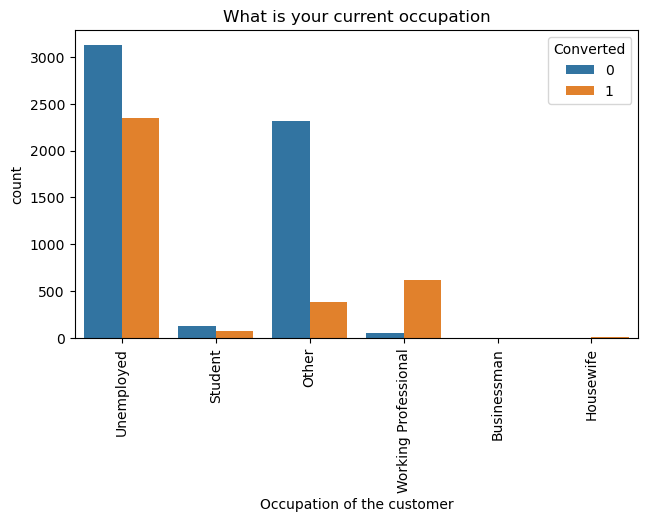

In [239]:
# Plotting the countplot of 'What is your current occupation'

plt.figure(figsize=(16,4))
plt.subplot(1, 2, 2)
sns.countplot(x='What is your current occupation', hue = 'Converted', data=df).tick_params(axis='x', rotation=90)
plt.xlabel('Occupation of the customer')
plt.title('What is your current occupation')
plt.show()

- Inference: As seen in the countplot above, **Unemployed** followed by **Other** has the most number of converted leads. Also **Working Professional** has a very good conversion ratio compared to other occupations.

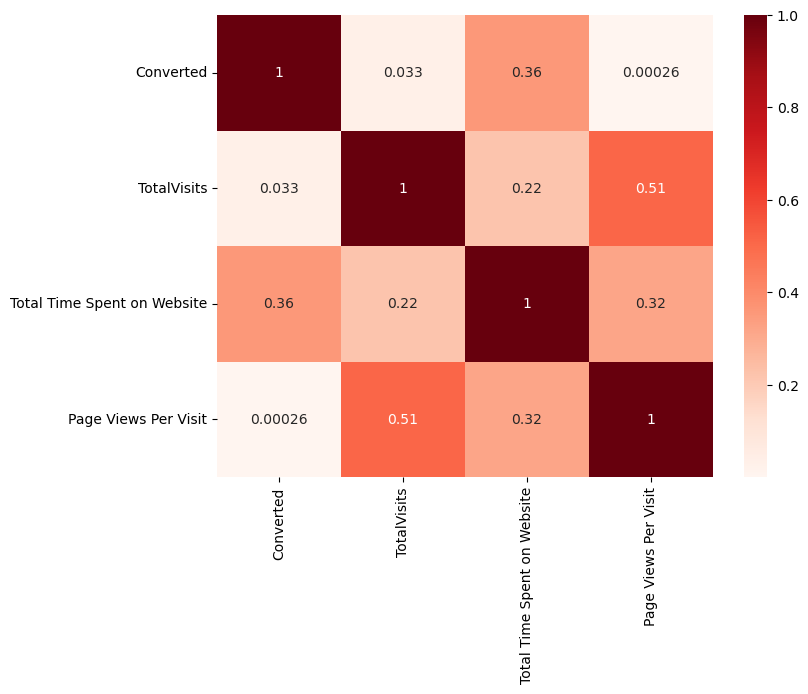

In [240]:
# Checking the Numberical columns for Corelation
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap= 'Reds')
plt.show()

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Specialization                                 9074 

## Converting Categorical Variables With Single Level Into Binary Variable ( 0 and 1)

In [242]:
# Columns with Single level category ('Yes and No' columns)
single_level = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

In [243]:
# defining a function to convert the single level category columns into binary level (0 and 1)
def convert_col(col):
    '''Converts columns into binary level (0 if No and 1 if Yes)'''
    df[col] = df[col].apply(lambda x: 0 if x=='No' else 1)

In [244]:
# Single level category columns before conversion
for col in single_level:
    print(df[col].value_counts())

No     8358
Yes     716
Name: Do Not Email, dtype: int64
No     9072
Yes       2
Name: Do Not Call, dtype: int64
No     9060
Yes      14
Name: Search, dtype: int64
No    9074
Name: Magazine, dtype: int64
No     9072
Yes       2
Name: Newspaper Article, dtype: int64
No     9073
Yes       1
Name: X Education Forums, dtype: int64
No     9073
Yes       1
Name: Newspaper, dtype: int64
No     9070
Yes       4
Name: Digital Advertisement, dtype: int64
No     9067
Yes       7
Name: Through Recommendations, dtype: int64
No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


In [245]:
# Converting the single level category columns
for col in single_level:
    convert_col(col)
    

In [246]:
# Single level category columns after conversion
for col in single_level:
    print(df[col].value_counts())

0    8358
1     716
Name: Do Not Email, dtype: int64
0    9072
1       2
Name: Do Not Call, dtype: int64
0    9060
1      14
Name: Search, dtype: int64
0    9074
Name: Magazine, dtype: int64
0    9072
1       2
Name: Newspaper Article, dtype: int64
0    9073
1       1
Name: X Education Forums, dtype: int64
0    9073
1       1
Name: Newspaper, dtype: int64
0    9070
1       4
Name: Digital Advertisement, dtype: int64
0    9067
1       7
Name: Through Recommendations, dtype: int64
0    6186
1    2888
Name: A free copy of Mastering The Interview, dtype: int64


## For categorical variables with multiple levels, creating dummy features

In [247]:
# Getting the columns with dtype: object
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

In [248]:
df['Specialization'].value_counts(normalize=True)

Others                               0.361693
Finance Management                   0.105687
Human Resource Management            0.092242
Marketing Management                 0.090699
Operations Management                0.054992
Business Administration              0.043972
IT Projects Management               0.040335
Supply Chain Management              0.038131
Banking, Investment And Insurance    0.036919
Travel and Tourism                   0.022261
Media and Advertising                0.022261
International Business               0.019396
Healthcare Management                0.017192
E-COMMERCE                           0.012233
Hospitality Management               0.012233
Retail Management                    0.011020
Rural and Agribusiness               0.008045
E-Business                           0.006282
Services Excellence                  0.004408
Name: Specialization, dtype: float64

In [249]:
# Geting the dummy variabes of 'Lead Origin'
Lead_Origin = pd.get_dummies(df['Lead Origin'], prefix = 'Lead_Origin')

# Dropping the 'Lead_Origin_Lead Add Form' column
Lead_Origin = Lead_Origin.drop('Lead_Origin_Lead Add Form', axis = 1)
df = pd.concat([df, Lead_Origin], axis = 1)

In [250]:
# Geting the dummy variabes of 'Specialization'
df_Specialization = pd.get_dummies(df['Specialization'], prefix = 'df_Specialization')

# Dropping the 'df_Specialization_Others' column
df_Specialization = df_Specialization.drop('df_Specialization_Others', axis = 1)
df = pd.concat([df, df_Specialization], axis = 1)

In [251]:
# Geting the dummy variabes of 'What is your current occupation'
df_occupation = pd.get_dummies(df['What is your current occupation'], prefix = 'What is your current occupation')

# Dropping the 'What is your current occupation_Other' column
df_occupation = df_occupation.drop('What is your current occupation_Other', axis = 1)
df = pd.concat([df, df_occupation], axis = 1)

In [252]:
# Geting the dummy variabes of 'What matters most to you in choosing a course'
df_choose = pd.get_dummies(df['What matters most to you in choosing a course'], prefix = 'What matters most to you in choosing a course')

# Dropping the 'What matters most to you in choosing a course_Other' column
df_choose = df_choose.drop('What matters most to you in choosing a course_Other', axis = 1)
df = pd.concat([df, df_choose], axis = 1)

In [253]:
df['Last Notable Activity'].value_counts(normalize=True)

Modified                        0.360040
Email Opened                    0.311109
SMS Sent                        0.237161
Page Visited on Website         0.035045
Olark Chat Conversation         0.020168
Email Link Clicked              0.019065
Email Bounced                   0.006612
Unsubscribed                    0.004959
Unreachable                     0.003527
Had a Phone Conversation        0.001543
Email Marked Spam               0.000220
Approached upfront              0.000110
Resubscribed to emails          0.000110
View in browser link Clicked    0.000110
Form Submitted on Website       0.000110
Email Received                  0.000110
Name: Last Notable Activity, dtype: float64

In [254]:
# Categorical Variables with multiple levels
multiple_level = ['Lead Source', 'Last Activity',  'Last Notable Activity']

In [255]:
# creating dummies for categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[multiple_level], drop_first=True)

In [256]:
# Dummy variable dataframe
dummy1

,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9238,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [257]:
# Concatinating df and dummy variable dataframe
df = pd.concat([df, dummy1], axis=1)

In [258]:
# Printing the top 5 rows of the dataframe after concatination
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Import,"df_Specialization_Banking, Investment And Insurance",df_Specialization_Business Administration,df_Specialization_E-Business,df_Specialization_E-COMMERCE,df_Specialization_Finance Management,df_Specialization_Healthcare Management,df_Specialization_Hospitality Management,df_Specialization_Human Resource Management,df_Specialization_IT Projects Management,df_Specialization_International Business,df_Specialization_Marketing Management,df_Specialization_Media and Advertising,df_Specialization_Operations Management,df_Specialization_Retail Management,df_Specialization_Rural and Agribusiness,df_Specialization_Services Excellence,df_Specialization_Supply Chain Management,df_Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,1,Email Opened,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [259]:
# Shape of the dataset after concatinating
df.shape

(9074, 99)

## Dropping the repeated variables

In [260]:
# We have created dummies for the following variables, so we can drop them
multiple_level = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Last Notable Activity']
df = df.drop(multiple_level, axis=1)

In [261]:
# Shape of the dataset after dropping the repeating columns
df.shape

(9074, 92)

In [262]:
# Printing the top 5 rows
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Import,"df_Specialization_Banking, Investment And Insurance",df_Specialization_Business Administration,df_Specialization_E-Business,df_Specialization_E-COMMERCE,df_Specialization_Finance Management,df_Specialization_Healthcare Management,df_Specialization_Hospitality Management,df_Specialization_Human Resource Management,df_Specialization_IT Projects Management,df_Specialization_International Business,df_Specialization_Marketing Management,df_Specialization_Media and Advertising,df_Specialization_Operations Management,df_Specialization_Retail Management,df_Specialization_Rural and Agribusiness,df_Specialization_Services Excellence,df_Specialization_Supply Chain Management,df_Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [263]:
# Printing the correlation values between all the columns
df.corr()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Import,"df_Specialization_Banking, Investment And Insurance",df_Specialization_Business Administration,df_Specialization_E-Business,df_Specialization_E-COMMERCE,df_Specialization_Finance Management,df_Specialization_Healthcare Management,df_Specialization_Hospitality Management,df_Specialization_Human Resource Management,df_Specialization_IT Projects Management,df_Specialization_International Business,df_Specialization_Marketing Management,df_Specialization_Media and Advertising,df_Specialization_Operations Management,df_Specialization_Retail Management,df_Specialization_Rural and Agribusiness,df_Specialization_Services Excellence,df_Specialization_Supply Chain Management,df_Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.004346,-0.140786,0.035715,-0.046192,0.036403,-0.011505,NaN,-0.004346,-0.003073,-0.003073,-0.006147,-0.008132,0.058023,-0.083921,0.099661,-0.016857,-0.020451,0.005017,0.012947,0.030648,-0.004882,0.011606,0.012054,-0.018428,0.070893,0.003297,-0.025537,0.000169,-0.013224,0.023922,0.028553,0.054570,0.003625,0.061126,-0.008694,-0.009222,0.007534,-0.024312,-0.047325,0.004346,-0.003073,0.112262,-0.017137,-0.070919,-0.004346,-0.003073,-0.051070,0.035510,-0.003073,0.050729,-0.035958,-0.010042,-0.004346,-0.003073,0.002835,-0.007529,-0.003073,-0.003073,-0.003073,0.035869,-0.063193,0.620041,-0.043705,0.050729,-0.220691,-0.004346,-0.018751,-0.007586,-0.055115,0.083819,-0.003073,-0.019915,0.007831,0.261142,-0.007529,-0.003073,0.278748,-0.037815,0.050729,-0.189628,-0.003073,-0.003073,-0.011505,0.122812,-0.012911,0.050922,-0.003073,-0.029608,-0.010516,0.241202,-0.003073
Do Not Call,-0.004346,1.000000,0.019024,0.003190,0.007029,-0.005979,-0.000584,NaN,-0.000220,-0.000156,-0.000156,-0.000312,-0.0004

In [264]:
# Printing the dtypes
df.dtypes

Do Not Email                                                                 int64
Do Not Call                                                                  int64
Converted                                                                    int64
TotalVisits                                                                float64
Total Time Spent on Website                                                  int64
Page Views Per Visit                                                       float64
Search                                                                       int64
Magazine                                                                     int64
Newspaper Article                                                            int64
X Education Forums                                                           int64
Newspaper                                                                    int64
Digital Advertisement                                                        int64
Thro

## Test-Train Split

In [265]:
# Performing the Test-Train split on the dataset
df_train,df_test= train_test_split(df ,train_size=0.7,random_state =100)
print(df_train.shape)
print(df_test.shape)

(6351, 92)
(2723, 92)


In [266]:
#Instantiate MinMaxScaler
scaler = MinMaxScaler()

#Converted                                      9074 non-null   int64  
 
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# Performing fit_transform
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Import,"df_Specialization_Banking, Investment And Insurance",df_Specialization_Business Administration,df_Specialization_E-Business,df_Specialization_E-COMMERCE,df_Specialization_Finance Management,df_Specialization_Healthcare Management,df_Specialization_Hospitality Management,df_Specialization_Human Resource Management,df_Specialization_IT Projects Management,df_Specialization_International Business,df_Specialization_Marketing Management,df_Specialization_Media and Advertising,df_Specialization_Operations Management,df_Specialization_Retail Management,df_Specialization_Rural and Agribusiness,df_Specialization_Services Excellence,df_Specialization_Supply Chain Management,df_Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,0,0.007968,0.178347,0.083333,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,0,0.007968,0.085355,0.083333,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,1,0.007968,0.619946,0.083333,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,1,0.019920,0.711590,0.104167,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

In [267]:
#y_train to contain only target variable
y_train=df_train.pop('Converted')

#X_train to contain all the  remainign variableother than Target
X_train=df_train

In [268]:
y_train.head()

3009    0
1012    0
9226    0
4750    1
7987    1
Name: Converted, dtype: int64

In [269]:
X_train.shape

(6351, 91)

## Model building using RFE method

In [270]:
# Instantiate LogisticRegression
logreg = LogisticRegression()

In [271]:
# Column elimination using RFE
rfe = RFE(logreg,n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

In [272]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 14),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('Search', False, 67),
 ('Magazine', False, 70),
 ('Newspaper Article', False, 17),
 ('X Education Forums', False, 57),
 ('Newspaper', False, 8),
 ('Digital Advertisement', False, 62),
 ('Through Recommendations', False, 56),
 ('A free copy of Mastering The Interview', False, 60),
 ('Lead_Origin_API', True, 1),
 ('Lead_Origin_Landing Page Submission', True, 1),
 ('Lead_Origin_Lead Import', False, 41),
 ('df_Specialization_Banking, Investment And Insurance', False, 19),
 ('df_Specialization_Business Administration', False, 28),
 ('df_Specialization_E-Business', False, 18),
 ('df_Specialization_E-COMMERCE', False, 21),
 ('df_Specialization_Finance Management', False, 24),
 ('df_Specialization_Healthcare Management', False, 22),
 ('df_Specialization_Hospitality Management', False, 45),
 ('df_Specialization_Human Resource Man

In [273]:
# variable selected for building model
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead_Origin_API',
       'Lead_Origin_Landing Page Submission',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Facebook', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [274]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Lead_Origin_Lead Import',
       'df_Specialization_Banking, Investment And Insurance',
       'df_Specialization_Business Administration',
       'df_Specialization_E-Business', 'df_Specialization_E-COMMERCE',
       'df_Specialization_Finance Management',
       'df_Specialization_Healthcare Management',
       'df_Specialization_Hospitality Management',
       'df_Specialization_Human Resource Management',
       'df_Specialization_IT Projects Management',
       'df_Specialization_International Business',
       'df_Specialization_Marketing Management',
       'df_Specialization_Media and Advertising',
       'df_Specialization_Operations Management',
       'df_Specialization_Retail Management',
       'df_Specialization_Rural and

In [275]:
# Defining a function which returns the vif values of the columns
def getvif(cols):
    vif = pd.DataFrame()
    vif['Features'] = X_train[rfe_col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
   # vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif.sort_values(by='VIF',ascending=False))

In [276]:
# Logistic regression model 1
X_train_sm = sm.add_constant(X_train[rfe_col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
getvif(rfe_col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.8
Date:                Tue, 20 Jun 2023   Deviance:                       5149.7
Time:                        21:08:36   Pearson chi2:                 6.03e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4068
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [277]:
# Let's drop TotalCharges since it has a high VIF
rfe_col = rfe_col.drop('What is your current occupation_Housewife')
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead_Origin_API',
       'Lead_Origin_Landing Page Submission',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Facebook', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [278]:
# Logistic regression model 2
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
getvif(rfe_col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2582.0
Date:                Tue, 20 Jun 2023   Deviance:                       5164.1
Time:                        21:08:37   Pearson chi2:                 6.06e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4054
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [279]:
# Let's drop TotalCharges since it has a high VIF
rfe_col = rfe_col.drop('Lead Source_Facebook')
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead_Origin_API',
       'Lead_Origin_Landing Page Submission',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [280]:
# Logistic regression model 3
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())
getvif(rfe_col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2582.8
Date:                Tue, 20 Jun 2023   Deviance:                       5165.7
Time:                        21:08:37   Pearson chi2:                 6.06e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4053
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [281]:
# Let's drop TotalCharges since it has a high VIF
rfe_col = rfe_col.drop('Lead_Origin_API')
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead_Origin_Landing Page Submission',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [282]:
# Logistic regression model 4
X_train_sm = sm.add_constant(X_train[rfe_col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())
getvif(rfe_col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2584.3
Date:                Tue, 20 Jun 2023   Deviance:                       5168.6
Time:                        21:08:37   Pearson chi2:                 6.06e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4050
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [283]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.098844
1012    0.358302
9226    0.193187
4750    0.712869
7987    0.674673
1281    0.776822
2880    0.050610
4971    0.951861
7536    0.852891
1248    0.638686
dtype: float64

In [284]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09884406, 0.35830206, 0.19318715, 0.71286854, 0.67467263,
       0.77682209, 0.05061003, 0.95186144, 0.85289088, 0.63868621])

In [285]:
# Converting an array into a DataFrame
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.098844
1,0,0.358302
2,0,0.193187
3,1,0.712869
4,1,0.674673


In [286]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted
0,0,0.098844,0
1,0,0.358302,0
2,0,0.193187,0
3,1,0.712869,1
4,1,0.674673,1


In [287]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3425  480]
 [ 701 1745]]


In [288]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8140450322783813


In [289]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [290]:
# Sensitivity of the training set
TP / float(TP + FN)

0.7134096484055601

In [291]:
# specificity of the training set
TN / float(TN + FP)

0.8770806658130602

## Plotting ROC curve

In [292]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [293]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

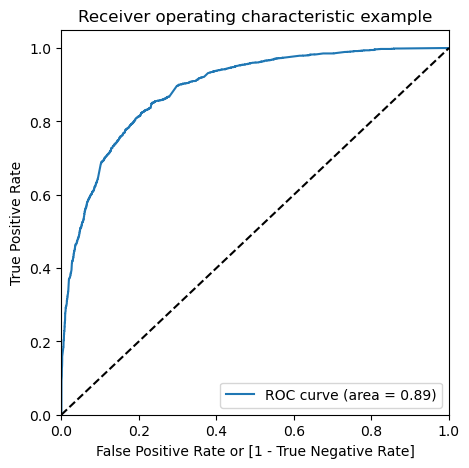

In [294]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

- Inference: From the ROC curve we can see that test is accurate as the curve follows closer to the left side border and top border

In [295]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.098844,0,1,0,0,0,0,0,0,0,0,0
1,0,0.358302,0,1,1,1,1,0,0,0,0,0,0
2,0,0.193187,0,1,1,0,0,0,0,0,0,0,0
3,1,0.712869,1,1,1,1,1,1,1,1,1,0,0
4,1,0.674673,1,1,1,1,1,1,1,1,0,0,0


In [296]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.617698  0.978332  0.391805
0.2   0.2  0.749331  0.917825  0.643790
0.3   0.3  0.797197  0.834832  0.773624
0.4   0.4  0.809794  0.783729  0.826120
0.5   0.5  0.814045  0.713410  0.877081
0.6   0.6  0.798614  0.601799  0.921895
0.7   0.7  0.782396  0.518397  0.947759
0.8   0.8  0.761612  0.430499  0.969014
0.9   0.9  0.715950  0.278414  0.990013


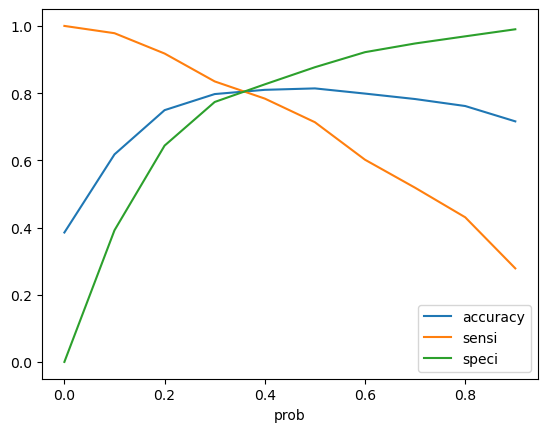

In [297]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- inference: different values of accuracy, sensitivity and specifity are calculated at different probablities. All these when plotted are merged at one point i.e 0.35. This can be taken as optimal cutoff for further calculation.

In [298]:
# calculating different probabilities based on the Optimal cut off 

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.098844,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.358302,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.193187,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.712869,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.674673,1,1,1,1,1,1,1,1,0,0,0,1


In [299]:
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Prospect ID
0,0,0.098844,0,1,0,0,0,0,0,0,0,0,0,0,3009
1,0,0.358302,0,1,1,1,1,0,0,0,0,0,0,1,1012
2,0,0.193187,0,1,1,0,0,0,0,0,0,0,0,0,9226
3,1,0.712869,1,1,1,1,1,1,1,1,1,0,0,1,4750
4,1,0.674673,1,1,1,1,1,1,1,1,0,0,0,1,7987


In [300]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))
y_train_pred_final[['Prospect ID','Converted','Conversion_Prob','predicted','final_predicted','Lead_Score']].head()


,Prospect ID,Converted,Conversion_Prob,predicted,final_predicted,Lead_Score
0,3009,0,0.098844,0,0,10
1,1012,0,0.358302,0,1,36
2,9226,0,0.193187,0,0,19
3,4750,1,0.712869,1,1,71
4,7987,1,0.674673,1,1,67


In [301]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8038104235553456

In [302]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3109,  796],
       [ 450, 1996]], dtype=int64)

In [303]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [304]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8160261651676206

In [305]:
# Let us calculate specificity
TN / float(TN+FP)

0.7961587708066581

In [306]:
# Calculate false postive rate - predicting converted when customer has not converted
print(FP/ float(TN+FP))

0.20384122919334188


In [307]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7148997134670487


In [308]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8735599887608879


In [309]:
# confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3109,  796],
       [ 450, 1996]], dtype=int64)

In [310]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7148997134670487

In [311]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8160261651676206

In [312]:

precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7148997134670487

In [313]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8160261651676206

In [314]:

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [315]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

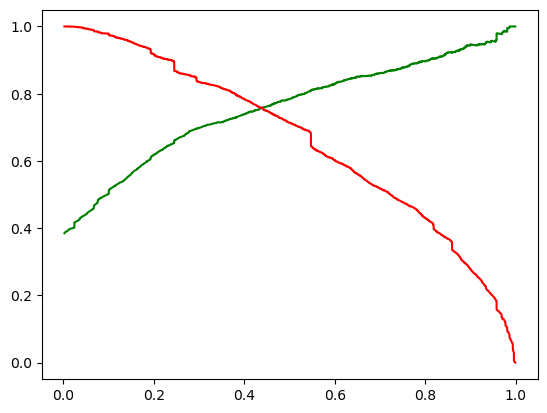

In [316]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Predictions on Test set

In [317]:
# List of numeric variables
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Import,"df_Specialization_Banking, Investment And Insurance",df_Specialization_Business Administration,df_Specialization_E-Business,df_Specialization_E-COMMERCE,df_Specialization_Finance Management,df_Specialization_Healthcare Management,df_Specialization_Hospitality Management,df_Specialization_Human Resource Management,df_Specialization_IT Projects Management,df_Specialization_International Business,df_Specialization_Marketing Management,df_Specialization_Media and Advertising,df_Specialization_Operations Management,df_Specialization_Retail Management,df_Specialization_Rural and Agribusiness,df_Specialization_Services Excellence,df_Specialization_Supply Chain Management,df_Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,0,0.015936,0.070530,0.166667,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0,0,1,0.019920,0.679695,0.208333,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7936,0,0,0,0.007968,0.033243,0.083333,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,0,0,1,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,0.031873,0.073675,0.333333,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

In [318]:
df_test.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Import,"df_Specialization_Banking, Investment And Insurance",df_Specialization_Business Administration,df_Specialization_E-Business,df_Specialization_E-COMMERCE,df_Specialization_Finance Management,df_Specialization_Healthcare Management,df_Specialization_Hospitality Management,df_Specialization_Human Resource Management,df_Specialization_IT Projects Management,df_Specialization_International Business,df_Specialization_Marketing Management,df_Specialization_Media and Advertising,df_Specialization_Operations Management,df_Specialization_Retail Management,df_Specialization_Rural and Agribusiness,df_Specialization_Services Excellence,df_Specialization_Supply Chain Management,df_Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.0,2723.0,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.0,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.00000,2723.0,2723.000000,2723.000000,2723.000000,2723.0,2723.0,2723.0,2723.0,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.0,2723.0,2723.000000,2723.000000,2723.0,2723.000000,2723.0,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.0
mean,0.078957,0.0,0.363202,

In [319]:
#y_test to contain only target variable
y_test = df_test.pop('Converted')

#X_train to contain all the remaining variable other than Target
X_test = df_test
X_test = X_test[rfe_col]

In [320]:
# Add a constant
X_test_sm = sm.add_constant(X_test)

# Getting the predicted values on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.129947
1490    0.966715
7936    0.113668
4216    0.841800
3830    0.066738
1800    0.674915
6507    0.420064
4821    0.349337
4223    0.957897
4714    0.076254
dtype: float64

In [321]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.rename(columns = {0 : 'prob_rate'}, inplace=True)
y_pred_1.head()

,prob_rate
3271,0.129947
1490,0.966715
7936,0.113668
4216,0.841800
3830,0.066738


In [322]:
# Converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0


In [323]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)
y_pred_final.head()

,Converted,prob_rate
3271,0,0.129947
1490,1,0.966715
7936,0,0.113668
4216,1,0.841800
3830,0,0.066738


In [324]:
y_pred_final['final_predicted'] = y_pred_final['prob_rate'].map(lambda x: 1 if x > 0.35 else 0)

In [325]:
y_pred_final['Prospect ID'] = y_pred_final.index

In [326]:
y_pred_final['Lead_Score'] = y_pred_final.prob_rate.map( lambda x: round(x*100))
y_pred_final.head()

,Converted,prob_rate,final_predicted,Prospect ID,Lead_Score
3271,0,0.129947,0,3271,13
1490,1,0.966715,1,1490,97
7936,0,0.113668,0,7936,11
4216,1,0.841800,1,4216,84
3830,0,0.066738,0,3830,7


Lead Score is calculated on the test data .Lead score is Probability *100.We can see  final predicted values and lead score above. Leads with cutoff of 0.3 probability rate is converted

In [327]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8027910392948954

In [328]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
print(confusion2)

[[1399  335]
 [ 202  787]]


In [329]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [330]:
# Sensitivity of the test set
TP / float(TP + FN)

0.7957532861476239

In [331]:
# specificity of the test set
TN / float(TN + FP)

0.8068050749711649

In [332]:
# Precision for the test set
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7014260249554367

In [333]:
# Recall for the test set
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.7957532861476239

# Conclusion

All the metrics of Train and Test data seem to be matching. We can conclude that the model is fit for predicting the Lead conversion.
    
- Following are the Train Data metrics: 
    - accuracy - 80%
    - sensitivity - 81%
    - Specificity - 79%
    - Precision - 71%
    - Recall - 81%

    <br>
    
- Following are the Test Data metrics: 
    - accuracy - 80%
    - sensitivity - 79%
    - specificity - 80%
    - precision - 70%
    - Recall - 79%
    